In [2]:
model r()
# This model describes simple central dogma
    J0: -> M ; a_m        #production of mRNA
    J1: M -> ; d_m*M      #degradation of mRNA 
    J2: M -> P ; a_p*M    #production of protein
    J3: P -> ; d_p*P      #degradation of protein
    
    # Parameters
    a_m = 10; d_m = 1     #prod and deg of mRNA
    a_p = 500; d_p = 0.05 #prod and deg of protein
    
    # Initial values (every species needs I.V.)
    M = 0
    P = 0
end

Success: Model can be accessed via variable r


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tellurium as te 
import time

#clears out any previous simulation results if it exists
r.reset() 

#the simulation is run, and is saved in "r.model", 
#but results are also stored in "result" by the line below
result = r.simulate(0,900,1000) #(start, end, timepoints)

# Find the steady-state value of Protein
P_ss = result[-1,2]
 # quick plot of model results
#You can do something like the following to alter the quick plot
#r.plot(ylim=[0,300])


r.simulate(0,200,200)

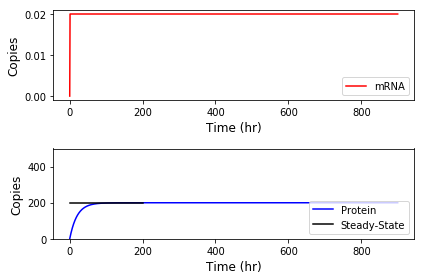

In [14]:
### Plotting "result" using matplotlib (more customizable)
#plot mRMA
plt.figure(1)
plt.subplot(211) #making two items one on top of another one
plt.plot(result[:,0], result[:,1], 'r', label = "mRNA") #[:,0 : all rows, ) the first column]
plt.ylabel('Copies', fontsize='12') 
plt.xlabel('Time (hr)', fontsize='12')
plt.legend(loc=4)
#plot protein
plt.subplot(212)
plt.plot(result[:,0], result[:,2], 'b', label = "Protein")
plt.plot([0,200], [P_ss,P_ss], 'k--', label = "Steady-State")
plt.ylim([0,500])
plt.ylabel('Copies', fontsize='12') 
plt.xlabel('Time (hr)', fontsize='12')
plt.legend(loc=4)
plt.tight_layout()

In [18]:
#%% Doing a parametric sweep using a for loop

# Investigate the input output relationship between 
# steady state Protein levels (P_ss)
# and mRNA production rate (a_m)
# or mRNA decay rate (d_m)

a_m = np.linspace(1,50,50)
#d_m = np.linspace(0.01, 10,10)     
d_m = np.array([0.0001,0.001,0.01,0.1,1,10,100])
P_ss = np.zeros(len(d_m))
T_r = np.zeros(len(d_m))
count = 0
for i in d_m:
    r = te.loada("""
        J0: -> M ; a_m
        J1: M -> ; d_m*M
        J2: M -> P ; a_p*M
        J3: P -> ; d_p*P
        
        # Parameters
        a_m = 10
        a_p = 500; d_p = 0.05
        
        # Initial values
        M = 0
        P = 0
        """
        # Iterating parameters
        "d_m = " + str(i) + ";"
    )
    result = r.simulate(0,200,1000)
    
    # Find the steady-state value
    P_ss[count] = result[-1,2]
    
#    print 'd_m =',d_m[count] #verbose print of current d_m value
    
    plt.figure(3)
    plt.semilogy(result[:,0],result[:,2],label=d_m[count])
    plt.legend()
    plt.xlabel("time")
    plt.ylabel("Protein")
    
    plt.figure(4)
    plt.plot(result[:,0],result[:,1],label=d_m[count])
    plt.legend()
    plt.xlabel("time")
    plt.ylabel("mRNA")
    
    time.sleep(.25)
   
### or you can print them one at a time.
#    if d_m[count] < 1:
#        r.plot(ylim=[0,10000000])
#    if d_m[count] >= 1:
#        r.plot(ylim=[0,100000])
#    time.sleep(.25)
   
    count += 1

In [16]:
#compare steady-state levels
plt.figure(5)
plt.hist(P_ss)
plt.xlabel("Protein value at Steady-state")

# Metabolic networks

* Assume there is no external degradation unless specified.
* Assume all production rates are at unity. 
* Assume boundary species are set to 10 counts.
* Assume initial values of floating species are at 0.

# Make a model of the first linear pathway
<img src="https://i.imgur.com/qUU0cea.jpg" alt="drawing" width="1000"/>

In [18]:
model one
    J0: $X0 -> S1 ; v_1 * X0    #you can put a $ sign before a species to set it to a boundary species (concentration doesn't change)
    J1: S1 -> S2 ; v_2 * S1
    J2: S2 -> S3 ; v_3 * S2
    J3: S3 -> S4 ; v_4 * S3
    J4: S4 -> $X5 ; v_5 * S4
    
    # Parameters
    v_1 = 1 
    v_2 = 3
    v_3 = 5
    v_4 = 2
    v_5 = 1
    
    # Initial values
    X0 = 10
    X5 = 10
    S1 = 0
    S2 = 0
    S3 = 0
    S4 = 0
end

Success: Model can be accessed via variable one


In [19]:
one.reset()
result = one.simulate(0,20,200)
one.plot()
one.getSteadyStateValues()

array([  3.33333333,   2.        ,   5.        ,  10.        ])

# Make a model of the second pathway (w/ feedback)
<img src="https://i.imgur.com/LTvgqC2.jpg" alt="drawing" width="800"/>

In [27]:
model two
    J0: $X0 -> S1 ; v_1 * X0 * (K/(K+S3))
    J1: S1 -> S2 ; v_2 * S1 * K
    J2: S2 -> S3 ; v_3 * S2 * K
    J3: S3 -> $X1 ; v_4 * S3 * K
    # Parameters
    K = 10
    v_1 = 1
    v_2 = 2
    v_3 = 3
    v_4 = 4
    # Initial values
    X0 = 5
    X1 = 10
    S1 = 0
    S2 = 0
    S3 = 0
end

Success: Model can be accessed via variable two


In [28]:
two.reset()
result = two.simulate(0,30,200)
two.plot()

# Make a model of this third complex pathway.
<img src="https://i.imgur.com/wizPbcl.jpg" alt="drawing" width="600"/>

In [31]:
model three
    J0: -> S1 ; v1 
    J1: S1 -> S2 ; v2 * S1 
    J2: -> S3 ; v6 
    J3: S2 -> ; v3 * S2
    J4: S3 -> S1 ; v4 * S3
    J5: S3 -> S2 ; v5 * S3 
    
    # Parameters
    v1 = 1
    v2 = 1
    v3 = 1
    v4 = 1
    v5 = 1
    v6 = 1
    
    # Initial values
    S1 = 0
    S2 = 0
    S3 = 0
end

Success: Model can be accessed via variable three


In [32]:
three.reset()
result = three.simulate(0,30,200)
three.plot()